# Normalization

**Import**

In [58]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import bbknn
import diffxpy.api as dxpy
import plotly.express as px

**Read anndata matrix**

In [7]:
path_out = f'/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/MAC/adata/'

adata_out_mm = f'{path_out}/preproc_1_starsolo_multimap_mac.h5ad'

In [8]:
# open saved data
adata = sc.read(adata_out_mm)

In [9]:
adata

AnnData object with n_obs × n_vars = 7770 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells'
    layers: 'raw_counts', 'spliced', 'unspliced'

In [10]:
cd '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/tutorial/Scripts/'

/faststorage/project/testis_singlecell/Workspaces/adahl/birc-project-akd/tutorial/Scripts


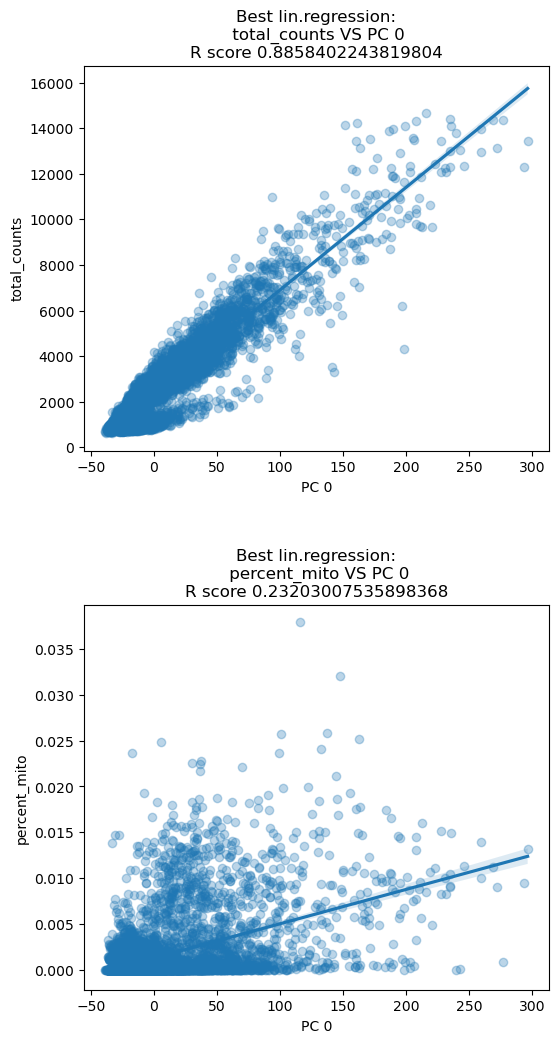

In [13]:
from pythonScripts import dependentFeatures

#PCA on unnormalized data
sc.preprocessing.pca(adata, svd_solver='arpack', random_state=12345)
#Calculating correlations
dependentFeatures(adata=adata, obs_subset=['total_counts','percent_mito'])

The biggest variation in the data at this point is explained by total UMI count. Normalizing with TPM should remove this bias.

In [ ]:
adata.obsm['X_pca']

In [ ]:
adata.varm['PCs']

In [ ]:
adata.uns['pca']

In [ ]:
adata.var['feature_types']

In [ ]:
adata.var['n_cells']

In [27]:
adata.var['chromosome']

LOC100996442     1
LOC112268260     1
LOC105378947     1
LOC100288069     1
LINC01409        1
                ..
ND3             MT
ND4             MT
ND5             MT
ND6             MT
CYTB            MT
Name: chromosome, Length: 24717, dtype: category
Categories (26, object): ['1', '2', '3', '4', ..., 'MT', 'Un', 'X', 'Y']

In [80]:
test=adata[adata.obs['DATASET']=='SN116']

In [81]:
test

View of AnnData object with n_obs × n_vars = 2803 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pca', 'log1p', 'hvg', 'neighbors', 'umap', 'DATASET_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'spliced', 'unspliced', 'scaled_counts'
    obsp: 'distances', 'connectivities'

In [28]:
lnc = adata.var_names # with LNC in name

Index(['LOC100996442', 'LOC112268260', 'LOC105378947', 'LOC100288069',
       'LINC01409', 'LINC01128', 'LOC284600', 'SAMD11', 'NOC2L', 'HES4',
       ...
       'ND1', 'COX1', 'COX2', 'ATP6', 'COX3', 'ND3', 'ND4', 'ND5', 'ND6',
       'CYTB'],
      dtype='object', length=24717)

In [ ]:
ss = [adata.var_names]

In [84]:
LINC = ['LINC' in i for i in adata.var_names] 

In [85]:
adata[:,LINC]

View of AnnData object with n_obs × n_vars = 7770 × 1261
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pca', 'log1p', 'hvg', 'neighbors', 'umap', 'DATASET_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'spliced', 'unspliced', 'scaled_counts'
    obsp: 'distances', 'connectivities'

In [86]:
adata[:,LINC].var_names

Index(['LINC01409', 'LINC01128', 'LINC01342', 'LINC01786', 'LINC01134',
       'LINC02780', 'LINC01672', 'LINC01714', 'LINC02606', 'LINC02766',
       ...
       'LINC00630', 'LINC02589', 'LINC01285', 'LINC00629', 'LINC00892',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1261)

In [7]:
adata.var['feature_types'] # all feature_types are "Gene expression"

LOC100996442    Gene Expression
LOC112268260    Gene Expression
LOC105378947    Gene Expression
LOC100288069    Gene Expression
LINC01409       Gene Expression
                     ...       
ND3             Gene Expression
ND4             Gene Expression
ND5             Gene Expression
ND6             Gene Expression
CYTB            Gene Expression
Name: feature_types, Length: 24717, dtype: category
Categories (1, object): ['Gene Expression']

In [ ]:
adata.obs.head()

In [ ]:
adata.obs.tail()

In [14]:
test = adata.var['chromosome']=='MT'

LOC100996442    False
LOC112268260    False
LOC105378947    False
LOC100288069    False
LINC01409       False
                ...  
ND3              True
ND4              True
ND5              True
ND6              True
CYTB             True
Name: chromosome, Length: 24717, dtype: bool

In [18]:
test_adata = [x for x in adata.var_names if adata.var['chromosome']=='MT']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
test_adata

[]

In [29]:
adata.layers

Layers with keys: raw_counts, spliced, unspliced

In [30]:
adata.to_df(layer="raw_counts")

LOC100996442  LOC112268260  LOC105378947  \
SN116_AAACCTGCACCGGAAA           0.0           0.0           0.0   
SN116_AAACCTGCAGACGCCT           0.0           0.0           0.0   
SN116_AAACCTGGTCCCGACA           0.0           0.0           0.0   
SN116_AAACCTGGTCTCAACA           0.0           0.0           0.0   
SN116_AAACCTGTCGGCGCAT           0.0           0.0           0.0   
...                              ...           ...           ...   
SN143_TTTGTCACATGCCTTC           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAACGA           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAGTAG           0.0           0.0           0.0   
SN143_TTTGTCATCTCTGTCG           0.0           0.0           0.0   
SN143_TTTGTCATCTTCGAGA           0.0           0.0           0.0   

                        LOC100288069  LINC01409  LINC01128  LOC284600  SAMD11  \
SN116_AAACCTGCACCGGAAA           0.0        0.0        0.0        0.0     0.0   
SN116_AAACCTGCAGACGCCT           0.0        0.0        0.0        0.0     0.0   
SN116_AAACCTGGTCCCGACA           0.0        0.0        0.0        0.0     0.0   
SN116_AAACCTGGTCTCAACA           0.0        0.0        0.0        0.0     0.0   
SN116_AAACCTGTCGGCGCAT           0.0        0.0        0.0        0.0     0.0   
...                              ...        ...        ...        ...     ...   
SN143_TTTGTCACATGCCTTC           0.0        0.0        0.0        0.0     0.0   
SN143_TTTGTCAGTGCAACGA           0.0        0.0        0.0        0.0     1.0   
SN143_TTTGTCAGTGCAGTAG           0.0        0.0        0.0        0.0     0.0   
SN143_TTTGTCATCTCTGTCG           0.0        0.0        0.0        0.0     0.0   
SN143_TTTGTCATCTTCGAGA           0.0        0.0        0.0        0.0     0.0   

                        NOC2L  HES4  ...  ND1  COX1  COX2  ATP6  COX3  ND3  \
SN116_AAACCTGCACCGGAAA    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN116_AAACCTGCAGACGCCT    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN116_AAACCTGGTCCCGACA    0.0   0.0  ...  0.0   0.0   0.0   1.0   3.0  0.0   
SN116_AAACCTGGTCTCAACA    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN116_AAACCTGTCGGCGCAT    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
...                       ...   ...  ...  ...   ...   ...   ...   ...  ...   
SN143_TTTGTCACATGCCTTC    0.0   0.0  ...  2.0   0.0   0.0   1.0   3.0  0.0   
SN143_TTTGTCAGTGCAACGA    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN143_TTTGTCAGTGCAGTAG    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN143_TTTGTCATCTCTGTCG    0.0   0.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
SN143_TTTGTCATCTTCGAGA    0.0   0.0  ...  4.0   0.0   1.0   1.0   3.0  0.0   

                        ND4  ND5  ND6  CYTB  
SN116_AAACCTGCACCGGAAA  0.0  0.0  0.0   0.0  
SN116_AAACCTGCAGACGCCT  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCCCGACA  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCTCAACA  0.0  0.0  0.0   0.0  
SN116_AAACCTGTCGGCGCAT  0.0  0.0  0.0   0.0  
...                     ...  ...  ...   ...  
SN143_TTTGTCACATGCCTTC  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAACGA  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAGTAG  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTCTGTCG  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTTCGAGA  0.0  0.0  0.0   0.0  

[7770 rows x 24717 columns]

In [15]:
# TPM normalization. 
sc.pp.normalize_per_cell(adata)

In [16]:
adata.to_df()

LOC100996442  LOC112268260  LOC105378947  \
SN116_AAACCTGCACCGGAAA           0.0           0.0           0.0   
SN116_AAACCTGCAGACGCCT           0.0           0.0           0.0   
SN116_AAACCTGGTCCCGACA           0.0           0.0           0.0   
SN116_AAACCTGGTCTCAACA           0.0           0.0           0.0   
SN116_AAACCTGTCGGCGCAT           0.0           0.0           0.0   
...                              ...           ...           ...   
SN143_TTTGTCACATGCCTTC           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAACGA           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAGTAG           0.0           0.0           0.0   
SN143_TTTGTCATCTCTGTCG           0.0           0.0           0.0   
SN143_TTTGTCATCTTCGAGA           0.0           0.0           0.0   

                        LOC100288069  LINC01409  LINC01128  LOC284600  \
SN116_AAACCTGCACCGGAAA           0.0        0.0        0.0        0.0   
SN116_AAACCTGCAGACGCCT           0.0        0.0        0.0        0.0   
SN116_AAACCTGGTCCCGACA           0.0        0.0        0.0        0.0   
SN116_AAACCTGGTCTCAACA           0.0        0.0        0.0        0.0   
SN116_AAACCTGTCGGCGCAT           0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
SN143_TTTGTCACATGCCTTC           0.0        0.0        0.0        0.0   
SN143_TTTGTCAGTGCAACGA           0.0        0.0        0.0        0.0   
SN143_TTTGTCAGTGCAGTAG           0.0        0.0        0.0        0.0   
SN143_TTTGTCATCTCTGTCG           0.0        0.0        0.0        0.0   
SN143_TTTGTCATCTTCGAGA           0.0        0.0        0.0        0.0   

                         SAMD11  NOC2L  HES4  ...       ND1  COX1      COX2  \
SN116_AAACCTGCACCGGAAA  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN116_AAACCTGCAGACGCCT  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN116_AAACCTGGTCCCGACA  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN116_AAACCTGGTCTCAACA  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN116_AAACCTGTCGGCGCAT  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
...                         ...    ...   ...  ...       ...   ...       ...   
SN143_TTTGTCACATGCCTTC  0.00000    0.0   0.0  ...  0.684408   0.0  0.000000   
SN143_TTTGTCAGTGCAACGA  0.48103    0.0   0.0  ...  0.000000   0.0  0.000000   
SN143_TTTGTCAGTGCAGTAG  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN143_TTTGTCATCTCTGTCG  0.00000    0.0   0.0  ...  0.000000   0.0  0.000000   
SN143_TTTGTCATCTTCGAGA  0.00000    0.0   0.0  ...  1.673828   0.0  0.418457   

                            ATP6      COX3  ND3  ND4  ND5  ND6  CYTB  
SN116_AAACCTGCACCGGAAA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGCAGACGCCT  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCCCGACA  0.803455  2.410364  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCTCAACA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGTCGGCGCAT  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
...                          ...       ...  ...  ...  ...  ...   ...  
SN143_TTTGTCACATGCCTTC  0.342204  1.026612  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAACGA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAGTAG  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTCTGTCG  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTTCGAGA  0.418457  1.255371  0.0  0.0  0.0  0.0   0.0  

[7770 rows x 24717 columns]

In [17]:
# matrix logarithmization (ln(x+1))
sc.pp.log1p(adata)

In [18]:
# to see counts
adata.to_df()

LOC100996442  LOC112268260  LOC105378947  \
SN116_AAACCTGCACCGGAAA           0.0           0.0           0.0   
SN116_AAACCTGCAGACGCCT           0.0           0.0           0.0   
SN116_AAACCTGGTCCCGACA           0.0           0.0           0.0   
SN116_AAACCTGGTCTCAACA           0.0           0.0           0.0   
SN116_AAACCTGTCGGCGCAT           0.0           0.0           0.0   
...                              ...           ...           ...   
SN143_TTTGTCACATGCCTTC           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAACGA           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAGTAG           0.0           0.0           0.0   
SN143_TTTGTCATCTCTGTCG           0.0           0.0           0.0   
SN143_TTTGTCATCTTCGAGA           0.0           0.0           0.0   

                        LOC100288069  LINC01409  LINC01128  LOC284600  \
SN116_AAACCTGCACCGGAAA           0.0        0.0        0.0        0.0   
SN116_AAACCTGCAGACGCCT           0.0        0.0        0.0        0.0   
SN116_AAACCTGGTCCCGACA           0.0        0.0        0.0        0.0   
SN116_AAACCTGGTCTCAACA           0.0        0.0        0.0        0.0   
SN116_AAACCTGTCGGCGCAT           0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
SN143_TTTGTCACATGCCTTC           0.0        0.0        0.0        0.0   
SN143_TTTGTCAGTGCAACGA           0.0        0.0        0.0        0.0   
SN143_TTTGTCAGTGCAGTAG           0.0        0.0        0.0        0.0   
SN143_TTTGTCATCTCTGTCG           0.0        0.0        0.0        0.0   
SN143_TTTGTCATCTTCGAGA           0.0        0.0        0.0        0.0   

                          SAMD11  NOC2L  HES4  ...       ND1  COX1     COX2  \
SN116_AAACCTGCACCGGAAA  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN116_AAACCTGCAGACGCCT  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN116_AAACCTGGTCCCGACA  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN116_AAACCTGGTCTCAACA  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN116_AAACCTGTCGGCGCAT  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
...                          ...    ...   ...  ...       ...   ...      ...   
SN143_TTTGTCACATGCCTTC  0.000000    0.0   0.0  ...  0.521414   0.0  0.00000   
SN143_TTTGTCAGTGCAACGA  0.392738    0.0   0.0  ...  0.000000   0.0  0.00000   
SN143_TTTGTCAGTGCAGTAG  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN143_TTTGTCATCTCTGTCG  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN143_TTTGTCATCTTCGAGA  0.000000    0.0   0.0  ...  0.983511   0.0  0.34957   

                            ATP6      COX3  ND3  ND4  ND5  ND6  CYTB  
SN116_AAACCTGCACCGGAAA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGCAGACGCCT  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCCCGACA  0.589704  1.226819  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCTCAACA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGTCGGCGCAT  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
...                          ...       ...  ...  ...  ...  ...   ...  
SN143_TTTGTCACATGCCTTC  0.294313  0.706365  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAACGA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAGTAG  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTCTGTCG  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTTCGAGA  0.349570  0.813314  0.0  0.0  0.0  0.0   0.0  

[7770 rows x 24717 columns]

In [19]:
# most variable genes, True or False
sc.pp.highly_variable_genes(adata, n_top_genes=15000)

In [20]:
# scale, standardized with mean 0 and variance 1
sc.pp.scale(adata)
adata.layers['scaled_counts'] = adata.X.copy()

In [21]:
adata.to_df()

LOC100996442  LOC112268260  LOC105378947  \
SN116_AAACCTGCACCGGAAA     -0.200025     -0.131292     -0.070652   
SN116_AAACCTGCAGACGCCT     -0.200025     -0.131292     -0.070652   
SN116_AAACCTGGTCCCGACA     -0.200025     -0.131292     -0.070652   
SN116_AAACCTGGTCTCAACA     -0.200025     -0.131292     -0.070652   
SN116_AAACCTGTCGGCGCAT     -0.200025     -0.131292     -0.070652   
...                              ...           ...           ...   
SN143_TTTGTCACATGCCTTC     -0.200025     -0.131292     -0.070652   
SN143_TTTGTCAGTGCAACGA     -0.200025     -0.131292     -0.070652   
SN143_TTTGTCAGTGCAGTAG     -0.200025     -0.131292     -0.070652   
SN143_TTTGTCATCTCTGTCG     -0.200025     -0.131292     -0.070652   
SN143_TTTGTCATCTTCGAGA     -0.200025     -0.131292     -0.070652   

                        LOC100288069  LINC01409  LINC01128  LOC284600  \
SN116_AAACCTGCACCGGAAA     -0.146392   -0.12295  -0.091897   -0.13013   
SN116_AAACCTGCAGACGCCT     -0.146392   -0.12295  -0.091897   -0.13013   
SN116_AAACCTGGTCCCGACA     -0.146392   -0.12295  -0.091897   -0.13013   
SN116_AAACCTGGTCTCAACA     -0.146392   -0.12295  -0.091897   -0.13013   
SN116_AAACCTGTCGGCGCAT     -0.146392   -0.12295  -0.091897   -0.13013   
...                              ...        ...        ...        ...   
SN143_TTTGTCACATGCCTTC     -0.146392   -0.12295  -0.091897   -0.13013   
SN143_TTTGTCAGTGCAACGA     -0.146392   -0.12295  -0.091897   -0.13013   
SN143_TTTGTCAGTGCAGTAG     -0.146392   -0.12295  -0.091897   -0.13013   
SN143_TTTGTCATCTCTGTCG     -0.146392   -0.12295  -0.091897   -0.13013   
SN143_TTTGTCATCTTCGAGA     -0.146392   -0.12295  -0.091897   -0.13013   

                          SAMD11    NOC2L      HES4  ...       ND1      COX1  \
SN116_AAACCTGCACCGGAAA -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN116_AAACCTGCAGACGCCT -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN116_AAACCTGGTCCCGACA -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN116_AAACCTGGTCTCAACA -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN116_AAACCTGTCGGCGCAT -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
...                          ...      ...       ...  ...       ...       ...   
SN143_TTTGTCACATGCCTTC -0.100330 -0.13976 -0.070454  ...  0.431126 -0.320314   
SN143_TTTGTCAGTGCAACGA  6.162318 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN143_TTTGTCAGTGCAGTAG -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN143_TTTGTCATCTCTGTCG -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN143_TTTGTCATCTTCGAGA -0.100330 -0.13976 -0.070454  ...  1.236764 -0.320314   

                            COX2      ATP6      COX3       ND3       ND4  \
SN116_AAACCTGCACCGGAAA -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN116_AAACCTGCAGACGCCT -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN116_AAACCTGGTCCCGACA -0.342312  1.715747  1.258343 -0.093679 -0.251779   
SN116_AAACCTGGTCTCAACA -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN116_AAACCTGTCGGCGCAT -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
...                          ...       ...       ...       ...       ...   
SN143_TTTGTCACATGCCTTC -0.342312  0.674394  0.493626 -0.093679 -0.251779   
SN143_TTTGTCAGTGCAACGA -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN143_TTTGTCAGTGCAGTAG -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN143_TTTGTCATCTCTGTCG -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN143_TTTGTCATCTTCGAGA  1.094033  0.869193  0.650769 -0.093679 -0.251779   

                             ND5       ND6      CYTB  
SN116_AAACCTGCACCGGAAA -0.153068 -0.071617 -0.208782  
SN116_AAACCTGCAGACGCCT -0.153068 -0.071617 -0.208782  
SN116_AAACCTGGTCCCGACA -0.153068 -0.071617 -0.208782  
SN116_AAACCTGGTCTCAACA -0.153068 -0.071617 -0.208782  
SN116_AAACCTGTCGGCGCAT -0.153068 -0.071617 -0.208782  
...                          ...       ...       ...  
SN143_TTTGTCACATGCCTTC -0.153068 -0.071617 -0.208782  
SN143_TTTGTCAGTG

In [22]:
adata.var

gene_ids    feature_types chromosome  n_cells  \
LOC100996442  LOC100996442  Gene Expression          1      491   
LOC112268260  LOC112268260  Gene Expression          1      239   
LOC105378947  LOC105378947  Gene Expression          1       65   
LOC100288069  LOC100288069  Gene Expression          1      280   
LINC01409        LINC01409  Gene Expression          1      167   
...                    ...              ...        ...      ...   
ND3                    ND3  Gene Expression         MT       87   
ND4                    ND4  Gene Expression         MT      626   
ND5                    ND5  Gene Expression         MT      251   
ND6                    ND6  Gene Expression         MT       61   
CYTB                  CYTB  Gene Expression         MT      498   

              highly_variable     means  dispersions  dispersions_norm  \
LOC100996442            False  0.031330    -0.037319         -0.497273   
LOC112268260            False  0.009463    -0.381812         -2.085102   
LOC105378947            False  0.002805    -0.413767         -2.232389   
LOC100288069             True  0.016779     0.053111         -0.080463   
LINC01409               False  0.012576    -0.025270         -0.441736   
...                       ...       ...          ...               ...   
ND3                     False  0.004273    -0.640185         -3.275995   
ND4                     False  0.053568     0.036552         -0.156784   
ND5                      True  0.022107     0.145964          0.347513   
ND6                     False  0.003099    -0.349603         -1.936647   
CYTB                     True  0.074144     1.113970          4.809235   

                  mean       std  
LOC100996442  0.022892  0.114447  
LOC112268260  0.007460  0.056817  
LOC105378947  0.002206  0.031221  
LOC100288069  0.012187  0.083249  
LINC01409     0.009064  0.073720  
...                ...       ...  
ND3           0.003469  0.037030  
ND4           0.038518  0.152986  
ND5           0.015387  0.100526  
ND6           0.002403  0.033554  
CYTB          0.041692  0.199689  

[24717 rows x 10 columns]

In [64]:
fig = px.histogram(adata.obs, x='doublet_scores', title='Distribution of doublet scores per cell')
fig.show()

In [23]:
adata.layers

Layers with keys: raw_counts, spliced, unspliced, scaled_counts

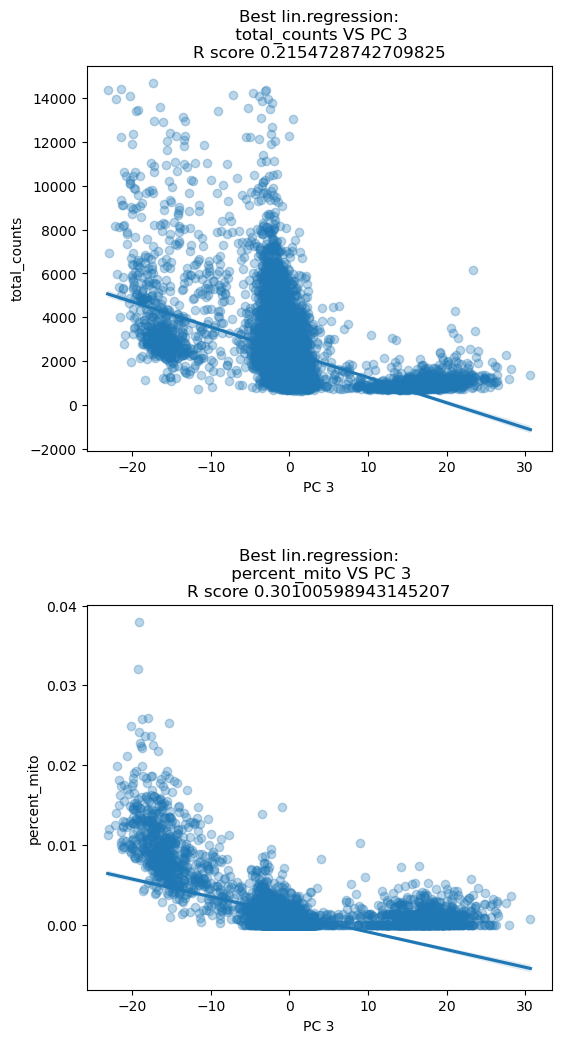

In [24]:
#PCA on normalized data
sc.preprocessing.pca(adata, svd_solver='arpack', random_state=12345)
#Calculating correlations
dependentFeatures(adata=adata, obs_subset=['total_counts','percent_mito'])

Now the correlation isn't strong.

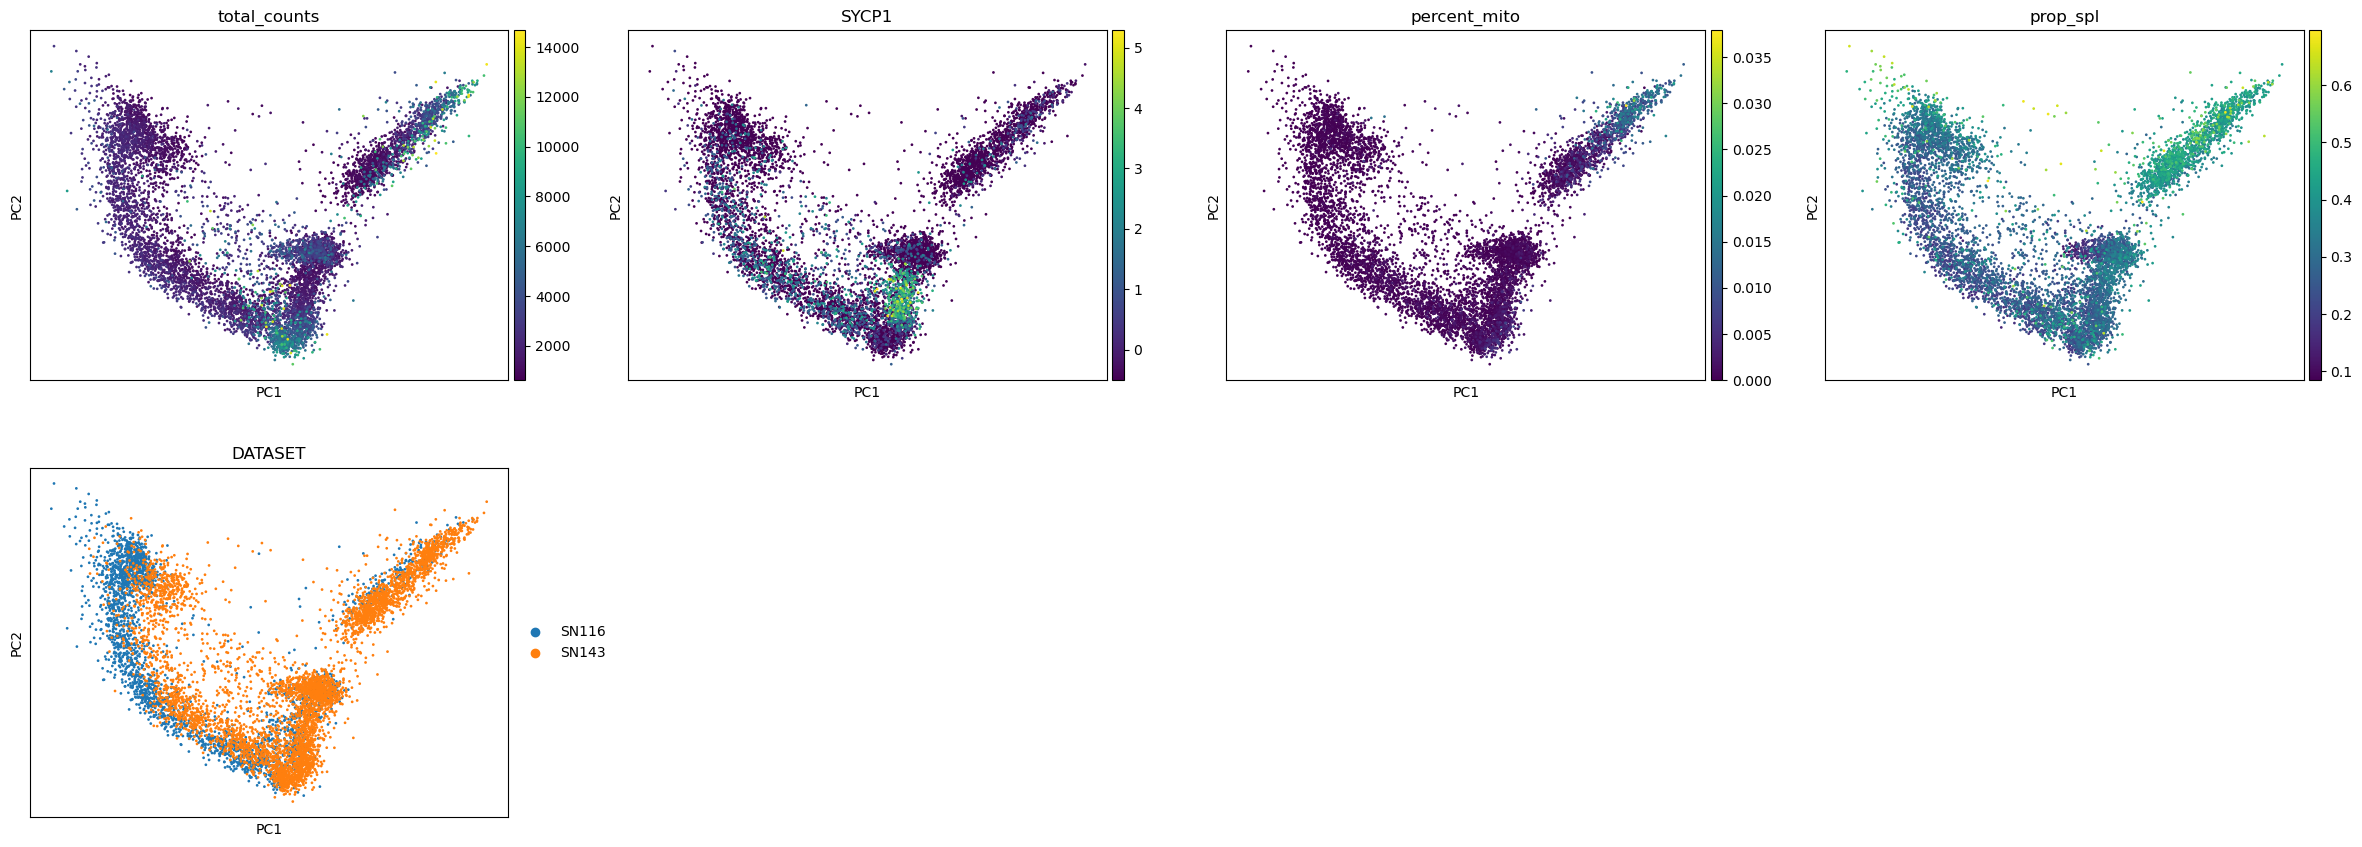

In [48]:
sc.pl.pca(adata, color=['total_counts', 'SYCP1', 'percent_mito', 'prop_spl', 'DATASET'])

Luckily the samples overlap, so they can be analyzed combined

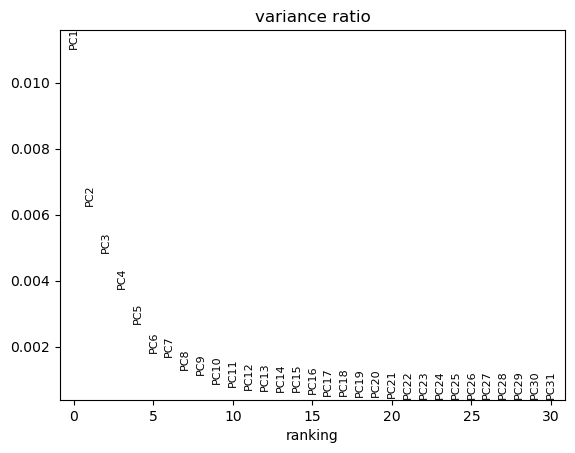

In [29]:
sc.plotting.pca_variance_ratio(adata) # small variance means it probably models noice in the data

Keep the PCs with the most variance, e.g. up to PC15

In [68]:
#sc.pp.neighbors(adata, n_pcs=15, random_state=12345) # use only for data with one single sample
bbknn.bbknn(adata, n_pcs=15)

In [ ]:
sc.tools.umap(adata, random_state=54321)

In [72]:
sc.tools.umap(adata, random_state=54321, n_components=3) # 3 components for 3D projection

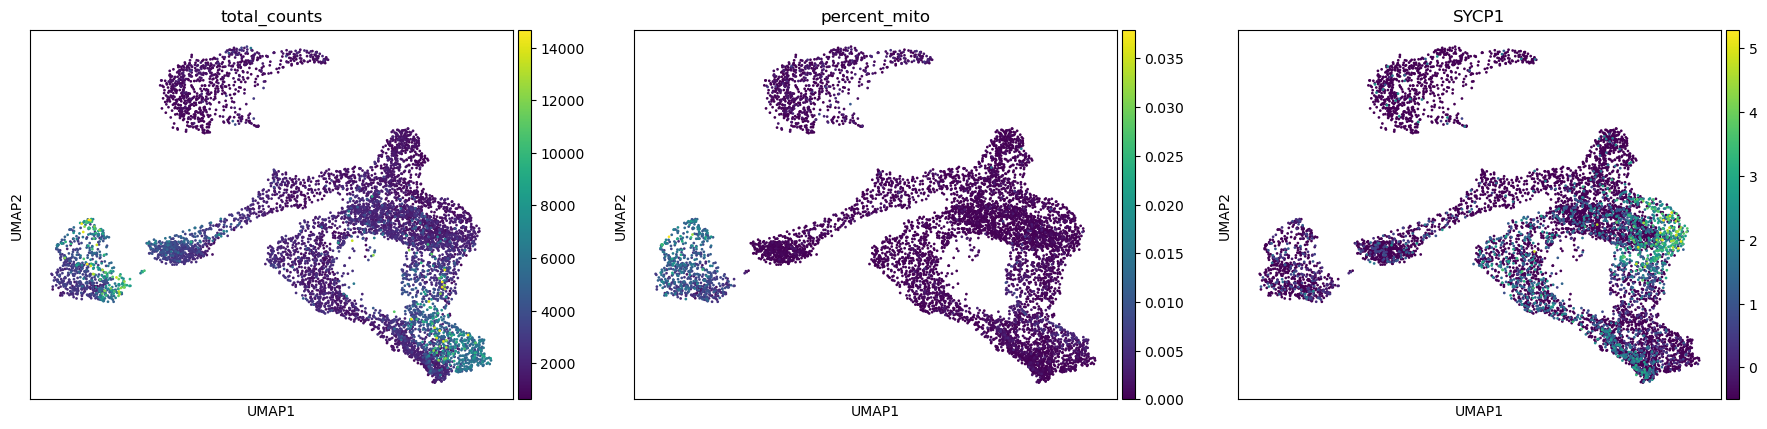

In [73]:
sc.plotting.umap(adata, color=['total_counts','percent_mito', 'SYCP1']) # 3 components for 3D projection

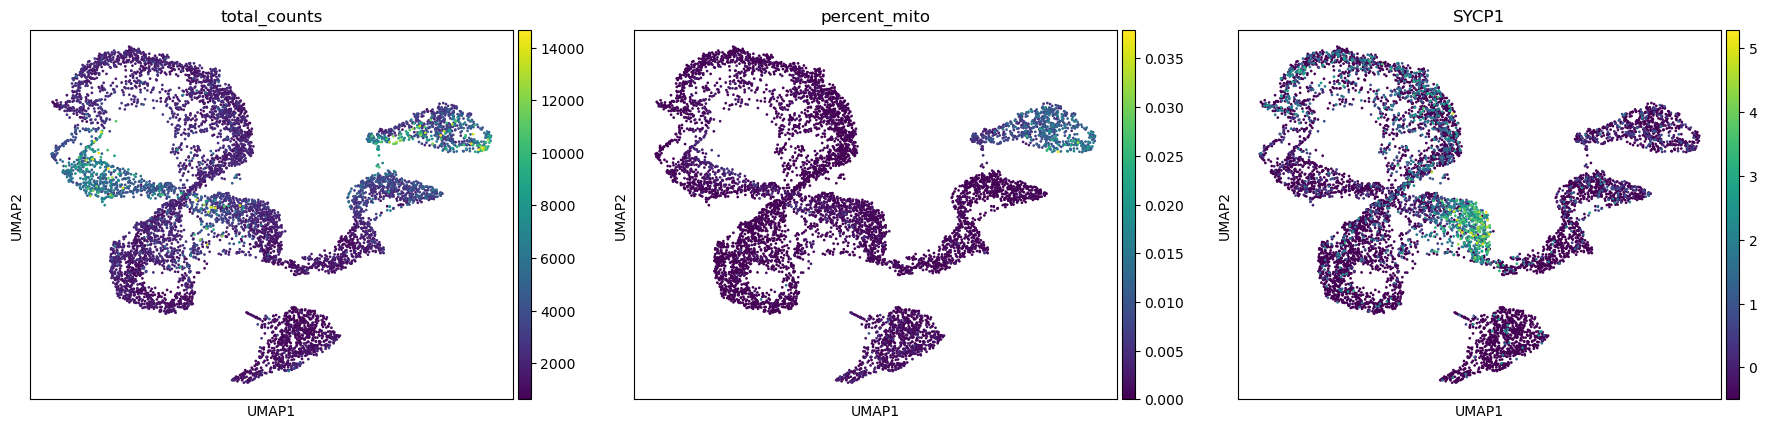

In [70]:
sc.plotting.umap(adata, color=['total_counts','percent_mito', 'SYCP1']) # 2D

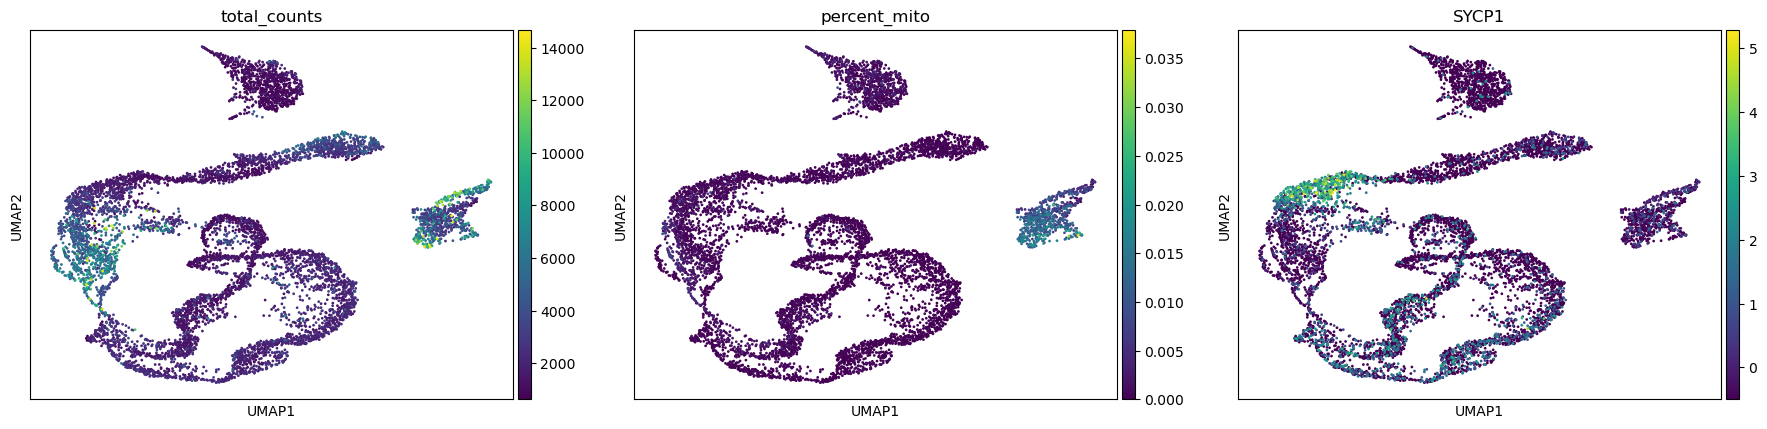

In [45]:
sc.plotting.umap(adata, color=['total_counts','percent_mito', 'SYCP1']) # using sc.pp.neighbors

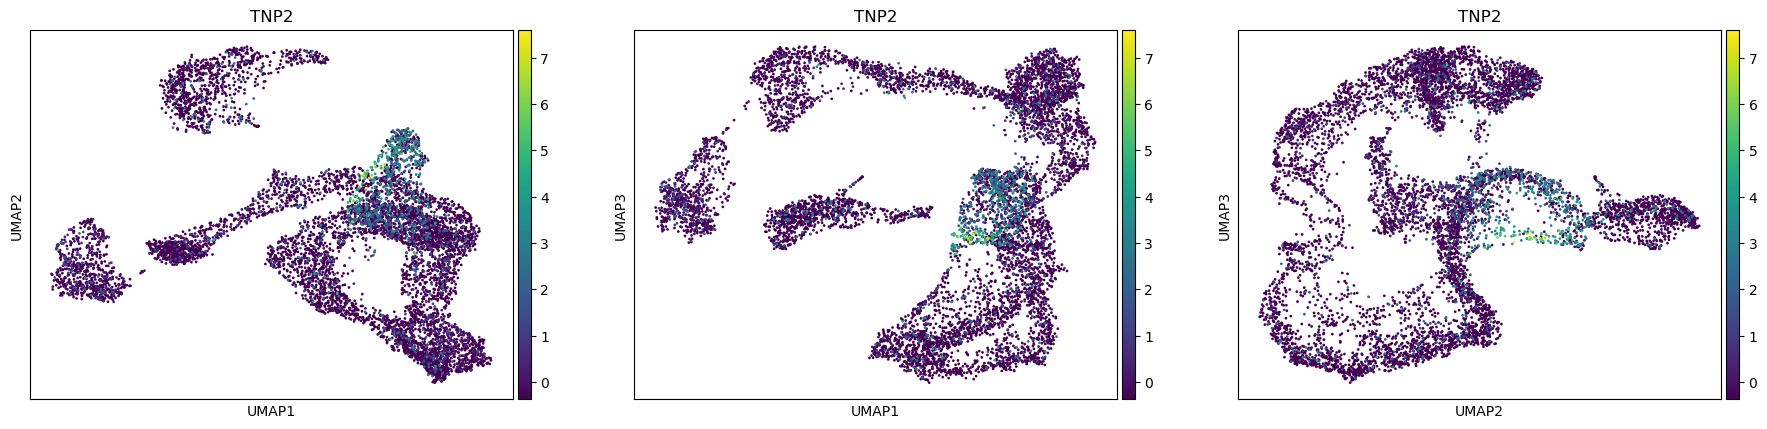

In [74]:
sc.plotting.umap(adata, color=['TNP2'], components=['1,2','1,3','2,3']) 

In [75]:
X = adata.obsm['X_umap']
fig = px.scatter_3d(adata.obsm, x=X[:,0], y=X[:,1], z=X[:,2], color=adata.obs['total_counts'], opacity=.5)
fig.show()

In [76]:
sc.plotting.umap(adata, color=['TNP2'], projection='3d', components=['1,2,3'] 

SyntaxError: incomplete input (3611962618.py, line 1)

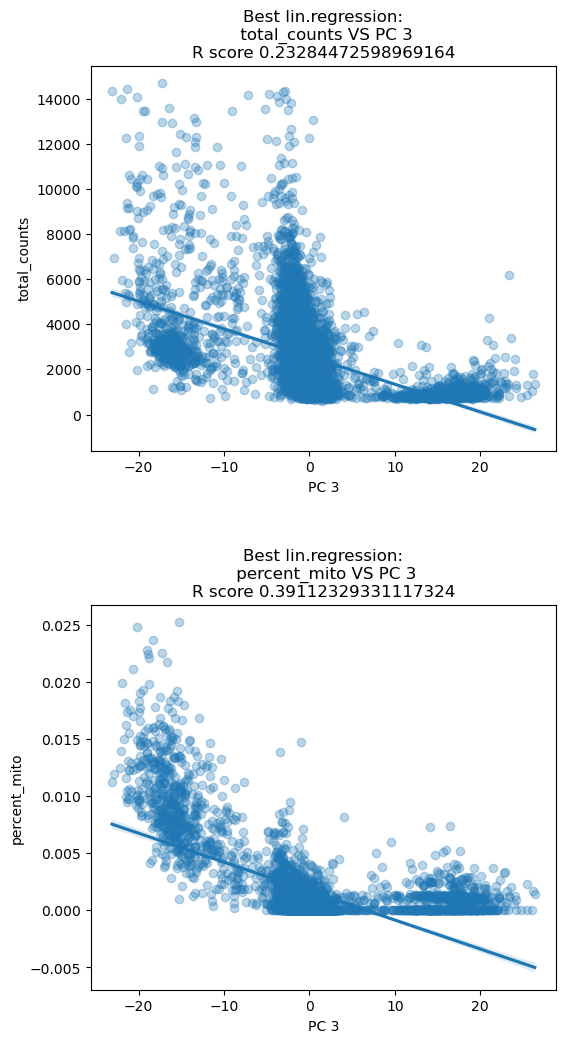

In [46]:
dependentFeatures(adata=adata[adata.obs['DATASET']=='SN143'], obs_subset=['total_counts','percent_mito'])

In [71]:
adata

AnnData object with n_obs × n_vars = 7770 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pca', 'log1p', 'hvg', 'neighbors', 'umap', 'DATASET_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'spliced', 'unspliced', 'scaled_counts'
    obsp: 'distances', 'connectivities'

In [36]:
print( list( adata.obs.columns ) )

['DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts']


In [65]:
print( list( adata.var.columns ) )

['gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std']


In [59]:
print( list( adata.obs['batch'] ) )


NameError: name 'sort' is not defined

In [82]:
markers = dict() #make an empty dictionary
### SPERMATOCYTOGENESIS
markers['SpermatogoniaA'] = ['ID4','HMGA1']
markers['SpermatogoniaB'] = ['MKI67','DMRT1','STRA8'] 
markers['SpermatocytesI'] = ['MEIOB','PRSS50','SYCP1','TEX101']
markers['SpermatocytesII'] = ['PIWIL1','ACRV1','SPATA16','CLGN']
### SPERMIOGENESIS
markers['Round.Spt'] = ['SPATA9','SPAM1'] #Round spermatids
markers['Elong.Spt'] = ['PRM1','PRM2'] #Elongated spermatids
### SOMATIC CELLS
markers['Sertoli'] = ['CTSL', 'VIM']
markers['Macroph'] = ['CD163','TYROBP']
markers['Leydig'] = ['CFD']
markers['Endothelial'] = ['CD34']
markers['Myoid'] = ['ACTA2']
markers['Pericyte'] = ['MYL9']

In [83]:
markers_scores, adata = marker_score(markers, adata)

NameError: name 'marker_score' is not defined